In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
#import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('./pyfiles/')

###  Dataset:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

In [2]:
import read_and_show as rs

df = rs.read_and_show()

App               9659
Category          9659
Rating            8196
Reviews           9659
Size              9659
Installs          9659
Type              9658
Price             9659
Content Rating    9659
Genres            9659
Last Updated      9659
Current Ver       9651
Android Ver       9657
dtype: int64
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


### Data Cleaning:
 - Convert all app sizes to MB
 - Remove '+' from 'Number of Installs' to make it numeric
 - Convert all review text to English language using Google Translator library

In [3]:
rs.clean_data(df)

<class 'numpy.ndarray'>


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


###  Basic EDA:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
seaborn : https://seaborn.pydata.org/
https://pythonbasics.org/seaborn-pairplot/
https://www.edureka.co/blog/python-seaborn-tutorial/

This is the basic exploratory analysis to look for any evident patterns or relationships between the features. 

how did we get free and paid points here?
https://seaborn.pydata.org/tutorial/color_palettes.html

### Installs

### Android market breakdown:

Which category has the highest share of (active) apps in the market?

https://plot.ly/python/pie-charts/

BEAUTY                   53
COMICS                   56
PARENTING                60
ART_AND_DESIGN           64
EVENTS                   64
HOUSE_AND_HOME           74
WEATHER                  79
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        85
ENTERTAINMENT           102
FOOD_AND_DRINK          112
EDUCATION               119
MAPS_AND_NAVIGATION     131
VIDEO_PLAYERS           163
DATING                  171
SHOPPING                202
TRAVEL_AND_LOCAL        219
BOOKS_AND_REFERENCE     222
SOCIAL                  239
NEWS_AND_MAGAZINES      254
PHOTOGRAPHY             281
HEALTH_AND_FITNESS      288
COMMUNICATION           315
SPORTS                  325
FINANCE                 345
LIFESTYLE               369
PRODUCTIVITY            374
PERSONALIZATION         376
MEDICAL                 395
BUSINESS                420
TOOLS                   827
GAME                    959
FAMILY                 1832
Name: Category, dtype: int64


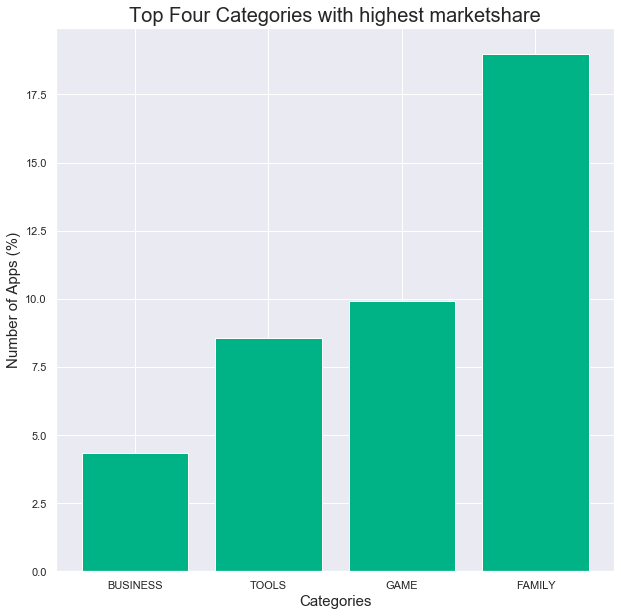

In [4]:
from pyfiles import eda as eda
eda.show_top_categories(df)

- **Family** and **Game** apps have the highest market prevelance. 
- Interestingly, **Tools, Business and Medical** apps are also catching up.

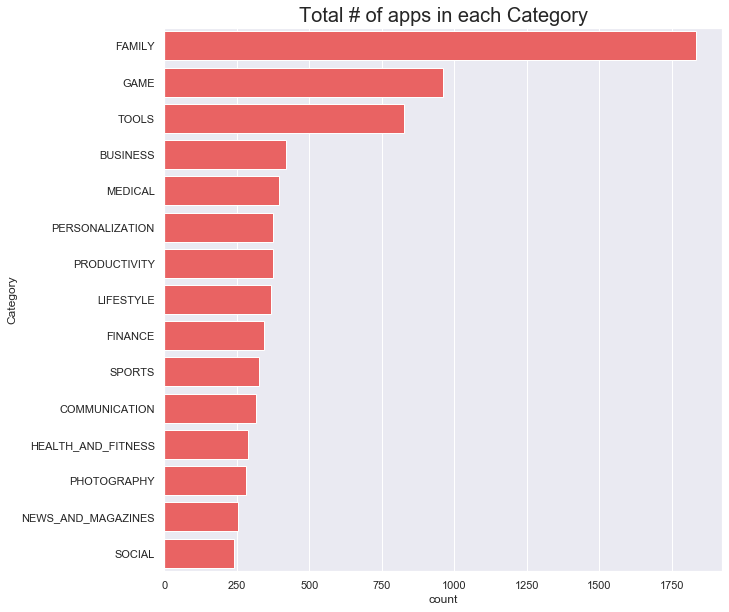

In [5]:
eda.show_categories_count(df)

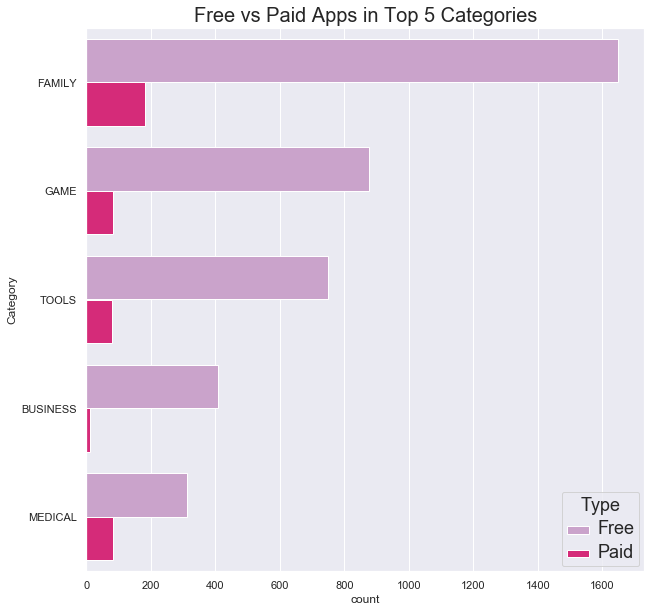

In [6]:
eda.show_categories_freeVspaid(df)

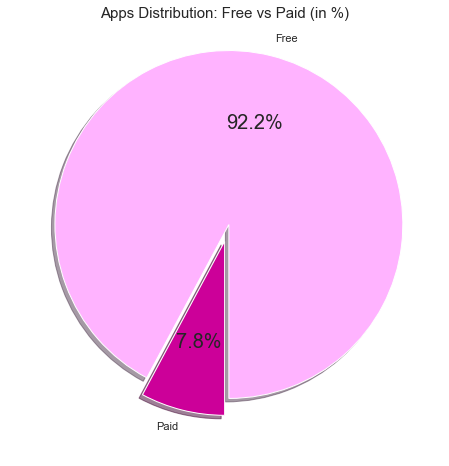

In [7]:
eda.show_freeVspaid(df)

### Number of Installs in each category

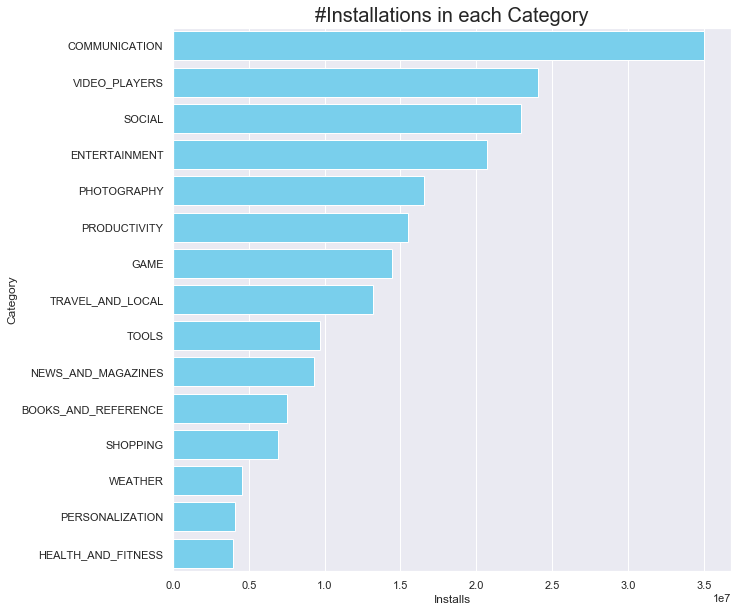

In [8]:
eda.show_installations_categories(df)

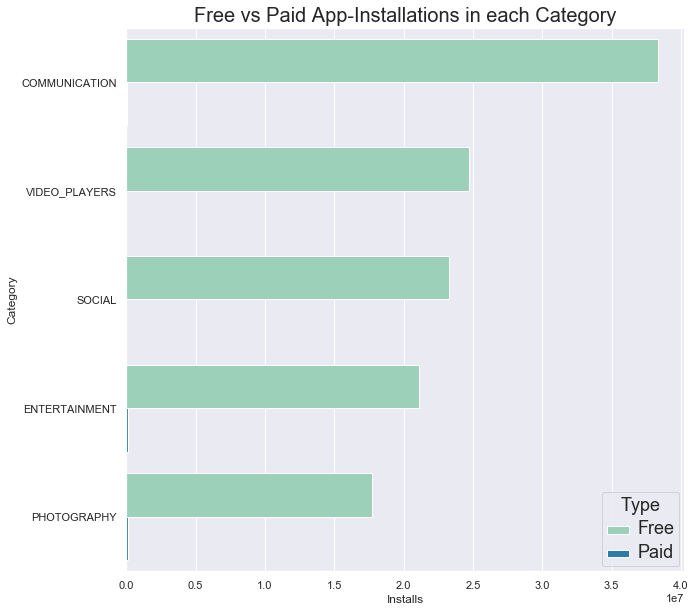

In [9]:
eda.show_installations_freeVspaid(df)

### Top 10 downloaded free apps

In [10]:
top_installed_apps = eda.get_top_installed_apps(df)
top_installed_apps

,App,Installs,Category,Type
152,Google Play Books,1 Billion,BOOKS_AND_REFERENCE,Free
336,WhatsApp Messenger,1 Billion,COMMUNICATION,Free
335,Messenger – Text and Video Chat for Free,1 Billion,COMMUNICATION,Free
391,Skype - free IM & video calls,1 Billion,COMMUNICATION,Free
338,Google Chrome: Fast & Secure,1 Billion,COMMUNICATION,Free
341,Hangouts,1 Billion,COMMUNICATION,Free
340,Gmail,1 Billion,COMMUNICATION,Free
865,Google Play Games,1 Billion,ENTERTAINMENT,Free
1654,Subway Surfers,1 Billion,GAME,Free
3736,Google News,1 Billion,NEWS_AND_MAGAZINES,Free


### Top 10 downloaded paid apps

In [11]:
top_installed_paid_apps = eda.get_top_installed_paid_apps(df)
top_installed_paid_apps

,App,Installs,Category,Type
2241,Minecraft,10 Million,FAMILY,Paid
8860,Bloons TD 5,1 Million,FAMILY,Paid
6675,Infinity Dungeon VIP,1 Million,FAMILY,Paid
2242,Card Wars - Adventure Time,1 Million,FAMILY,Paid
9678,Where's My Water?,1 Million,FAMILY,Paid
4260,Cut the Rope GOLD,1 Million,FAMILY,Paid
4034,Hitman Sniper,10 Million,GAME,Paid
5631,Five Nights at Freddy's,1 Million,GAME,Paid
7417,Grand Theft Auto: San Andreas,1 Million,GAME,Paid
4842,Zombie Avengers:(Dreamsky)Stickman War Z,1 Million,GAME,Paid


### Reviews & Installs

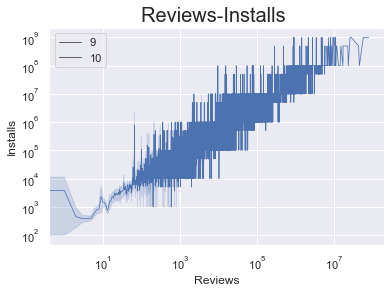

In [12]:
import reviews as rv

rv.show_reviewsVsinstalls_lineplot(df)

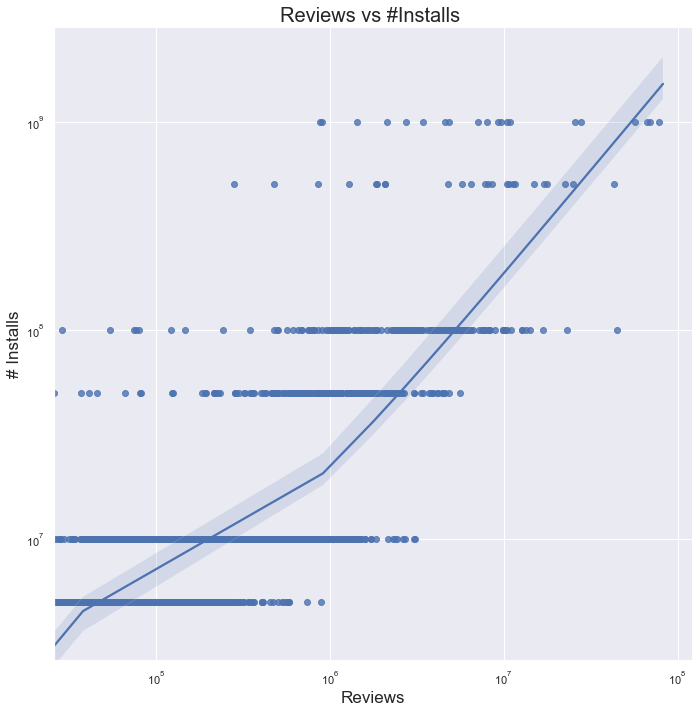

In [13]:
rv.show_reviewsVsinstalls_lmplot(df)

Here is the correlation we are searching for! The Reviews, unlike Rating, describe the Installs in a linear way.

### Installs and ratings review:

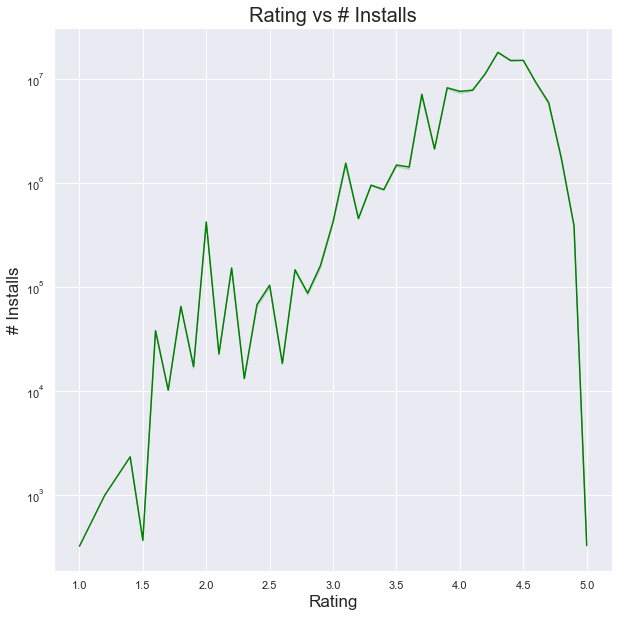

In [14]:
import installs as ins

ins.show_installsVsratings(df)

So it seems that a Rating between 2.8 and 4.8 is desirable. But over 4.8 the Installations drop significantly and that makes sense. Imagine a Youtube video with millions of views. There is no way to have 100% likes. But a video with only a few views (as many as youtuber's friends and relatives :P ), is quite possible to have zero dislikes. That is what exactly happens with such high Ratings!

### Size & Installs:

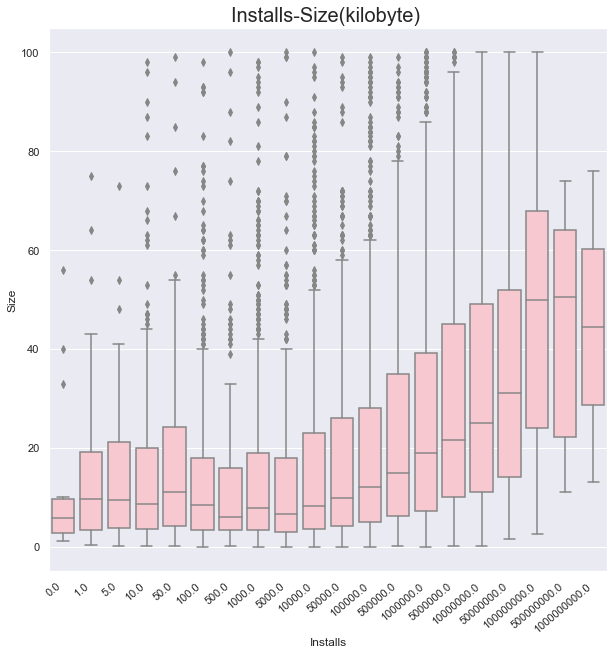

In [15]:
ins.show_installsVssize(df)

After viewing this graph, we can conclude that as Installs increase, the size increases as well. But why is that? One of the most appealing things in an app is its appearance. Realistic pictures, 3D models, dazzling animations and beautiful music make up for a more pleasant experience to the user. But all of the above seriously increase the size of the app . So this graph basically says: Your app has to be beautiful!

## Ratings

###  Average rating of apps:

Do any apps perform really good or really bad?

https://stackoverflow.com/questions/40629949/python-plotly-multiple-histogram-with-mean-line

https://plot.ly/python/histograms/
https://plot.ly/python/reference/#histogram

In [16]:
data = [go.Histogram(
        x = df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(df['Rating']))

Average app rating =  4.173243045387998


### App ratings across categories - One Way Anova Test:

https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

scipy.stats.f_oneway

scipy.stats.f_oneway(*args)

Perform one-way ANOVA.

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

Parameters:

sample1, sample2, …array_like - The sample measurements for each group.

Returns:

statisticfloat - The computed F-value of the test.

pvaluefloat - The associated p-value from the F-distribution.

F_onewayResult(statistic=12.79263715618054, pvalue=2.323280446259348e-20)

The p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.



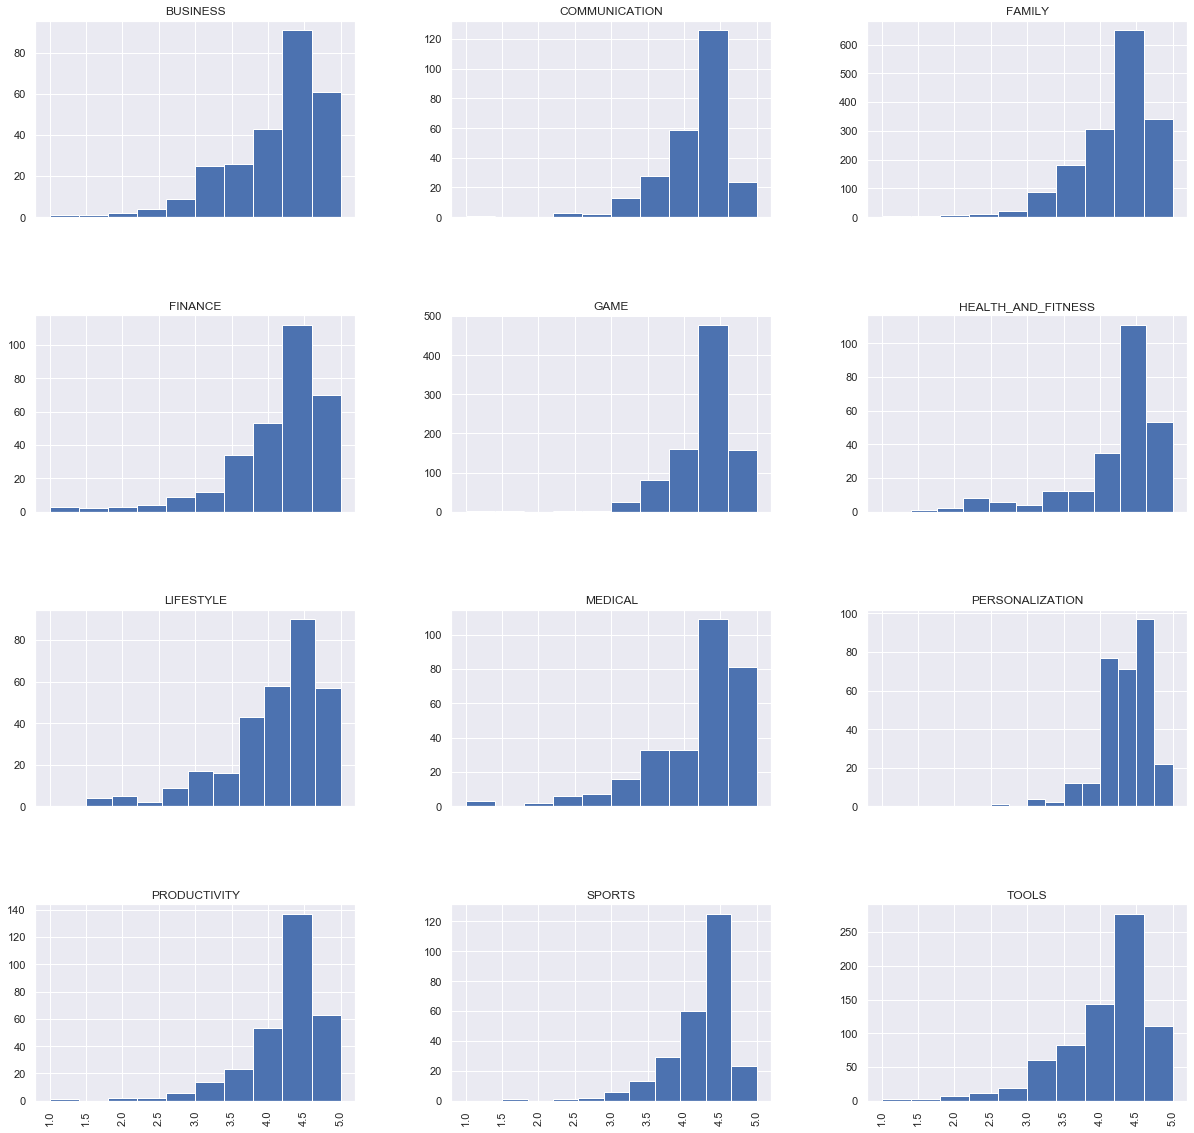

In [17]:
import ratings as rt

rt.show_ratings_across_categories(df)

The average app ratings across categories is significantly different.

### Sizing Strategy - Light or bulky? 

How do app sizes impact the app rating?

<Figure size 720x720 with 0 Axes>

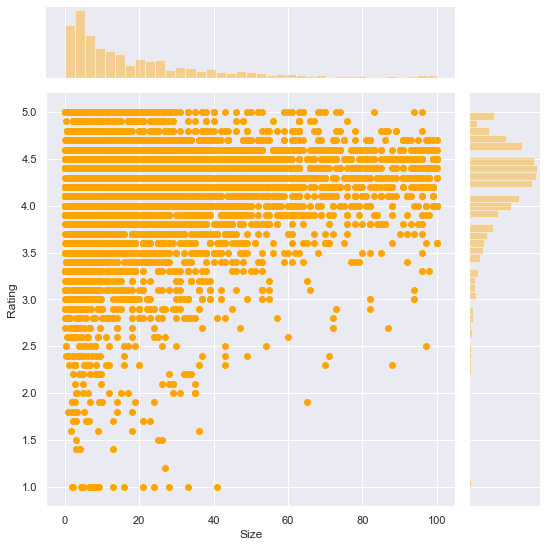

In [18]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
g = sns.jointplot(x="Size", y="Rating",color = 'orange', data=df,size = 8);

Most top rated apps are optimally sized between **~2MB to ~40MB** - neither too light nor too bulky

### Pricing Strategy - Free Vs Paid?

How do app prices impact app rating?

<Figure size 720x720 with 0 Axes>

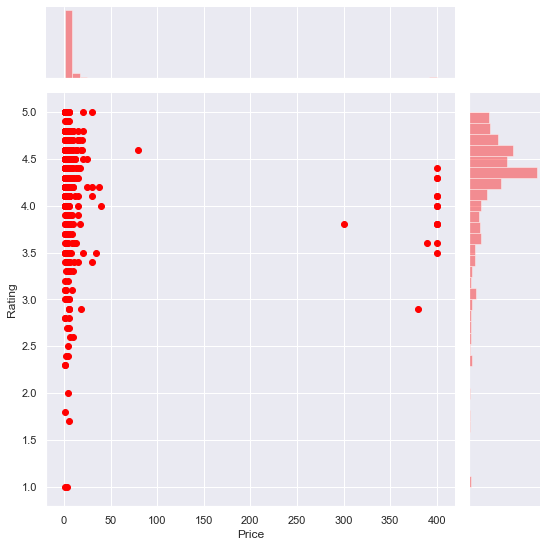

In [19]:
import pricing as pc
pc.show_priceVsrating(df)

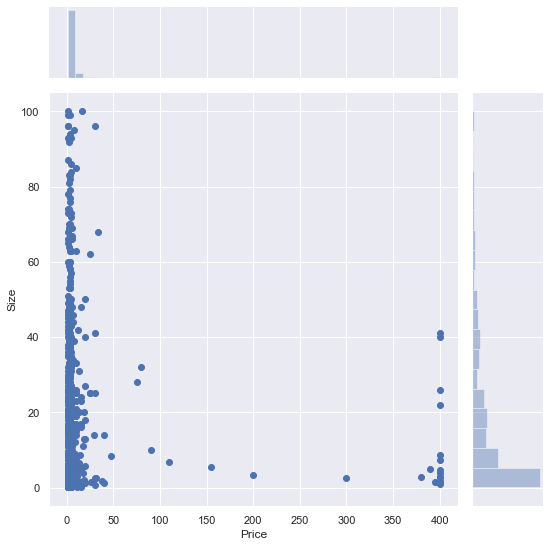

In [21]:
pc.show_priceVssize(df)

Most top rated apps are optimally priced between 1 to 30. There are only a very few apps priced above 20\$.

### Current pricing trend - How to price your app?

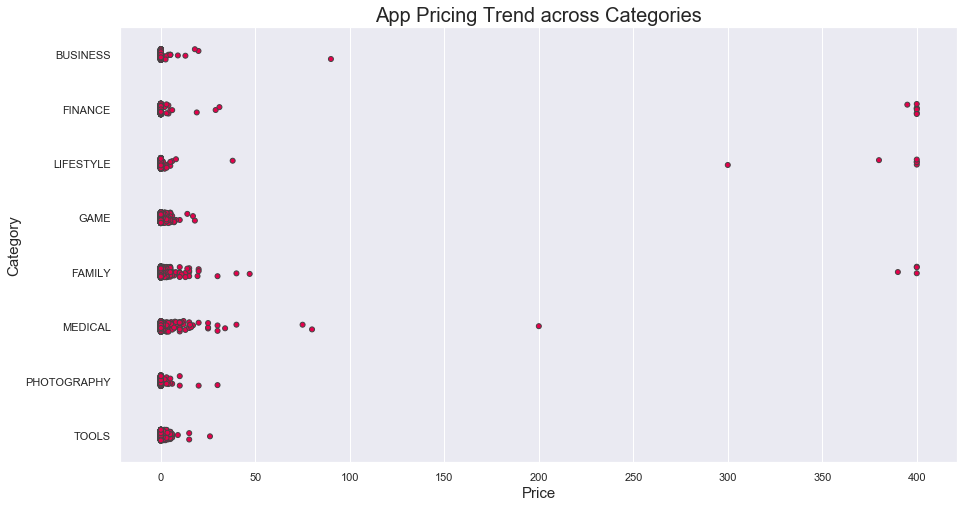

In [22]:
pc.show_priceVscategory(df)

There are some apps priced above 250\$ !!!  Let's examine what these apps are.

In [23]:
highest_priced_Apps = df.sort_values(by=['Price'], ascending=False)
highest_priced_Apps[['App', 'Price', 'Category']][:15]

,App,Price,Category
4367,I'm Rich - Trump Edition,400.00,LIFESTYLE
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99,LIFESTYLE
5359,I am rich(premium),399.99,FINANCE
5358,I am Rich!,399.99,FINANCE
5373,I AM RICH PRO PLUS,399.99,FINANCE
5356,I Am Rich Premium,399.99,FINANCE
5354,I am Rich Plus,399.99,FAMILY
5364,I am rich (Most expensive app),399.99,FINANCE
5369,I am Rich,399.99,FINANCE
5351,I am rich,399.99,LIFESTYLE


Some of the apps are for specific purpose

In [24]:
ab = df[df.Price < 100].sort_values(by=['Price'], ascending=False)
ab[['App','Price', 'Category','Rating','Installs']][:10]

,App,Price,Category,Rating,Installs
9730,Lean EQ,89.99,BUSINESS,NaN,10.0
2253,Vargo Anesthesia Mega App,79.99,MEDICAL,4.6,1000.0
2390,Language Therapy: Aphasia,74.99,MEDICAL,NaN,1000.0
6559,Dr.Dice - Sic bo analyzer,46.99,FAMILY,NaN,10.0
4134,Norwegian For Kids & Babies F,39.99,FAMILY,NaN,5.0
2414,LTC AS Legal,39.99,MEDICAL,4.0,100.0
5360,I am Rich Person,37.99,LIFESTYLE,4.2,1000.0
2301,A Manual of Acupuncture,33.99,MEDICAL,3.5,1000.0
9905,Eu sou Rico,30.99,FINANCE,NaN,0.0
8328,Guide to Nikon Df,29.99,PHOTOGRAPHY,NaN,10.0


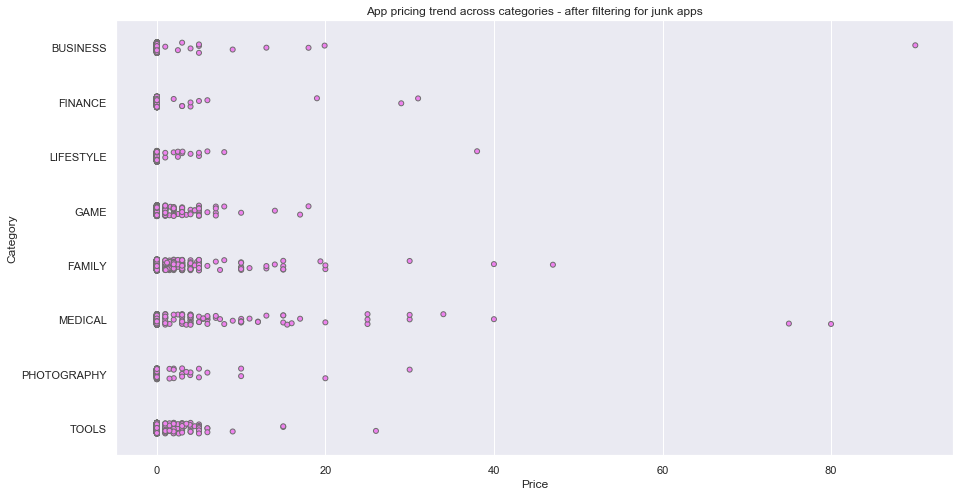

In [25]:
pc.show_priceVscategory_filtered(df)

- Clearly, **Medical and Family apps** are the most expensive. Some medical apps extend even upto 80\$.


- All other apps are priced under 30\$.


- Surprisingly, **all game apps are reasonably priced below 20\$.**

### Distribution of paid and free apps across categories:

             Category  Type  App
0      ART_AND_DESIGN  Free   61
1      ART_AND_DESIGN  Paid    3
2   AUTO_AND_VEHICLES  Free   82
3   AUTO_AND_VEHICLES  Paid    3
4              BEAUTY  Free   53
..                ...   ...  ...
58   TRAVEL_AND_LOCAL  Paid   12
59      VIDEO_PLAYERS  Free  159
60      VIDEO_PLAYERS  Paid    4
61            WEATHER  Free   71
62            WEATHER  Paid    8

[63 rows x 3 columns]


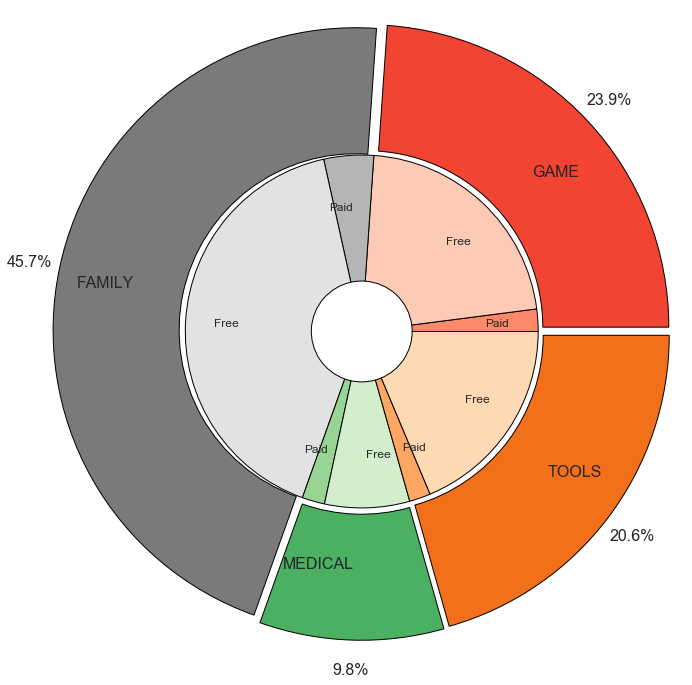

In [26]:
pc.show_freeVspaid_distri_categories(df)